<a href="https://colab.research.google.com/github/amena-hira/ice-cream/blob/master/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Student_level.csv to Student_level.csv
User uploaded file "Student_level.csv" with length 100822 bytes


In [2]:
df= pd.read_csv("Student_level.csv")
df.head()

,gender,nationality,place_of_birth,department,current_year,time_of_group_study,absent_in_a_semester,last_semester_result,parents_satisfied_with_result,amount_of_drop_semester,drop_reason,meet_with_advisor,ask_questions_in_class,use_additional_course_material_for_study,due_amount,institutional_name,current_result_cgpa,fathers_education,mothers_education
0,Male,Bangladesh,Dhaka,Software Engineering,2nd,10.0,2.0,3.85,Yes,1,Personal,Yes,Yes,NO,"20,001-40,000",Daffodil International University,3.80,Graduation,Graduation
1,Male,Bangladesh,Gaibandha,Software Engineering,2nd,10.0,10.0,3.83,No,1,Financial,Yes,Yes,Yes,0,Daffodil International University,3.70,Graduation,Graduation
2,Male,Bangladesh,Joypurhat,Software Engineering,2nd,15.0,1.0,3.98,Yes,0,Personal,Yes,Yes,Yes,0,Daffodil International University,3.94,Graduation,Graduation
3,Male,Bangladesh,Bogra,Software Engineering,2nd,4.0,2.0,3.60,Yes,1,Personal,Yes,Yes,NO,"60,001-80,000",Daffodil International University,3.50,Graduation,Graduation
4,Male,Bangladesh,Sunamganj,Software Engineering,2nd,1.0,10.0,3.42,No,1,Depression,No,No,NO,"60,001-80,000",Daffodil International University,3.55,Graduation,Graduation


In [3]:
df['drop_reason'].unique()

array(['Personal', 'Financial', 'Depression', nan, 'Poor Academic Result',
       'Irregularity'], dtype=object)

In [4]:
df.columns = df.columns.str.replace(' ','_')
df.head()

,gender,nationality,place_of_birth,department,current_year,time_of_group_study,absent_in_a_semester,last_semester_result,parents_satisfied_with_result,amount_of_drop_semester,drop_reason,meet_with_advisor,ask_questions_in_class,use_additional_course_material_for_study,due_amount,institutional_name,current_result_cgpa,fathers_education,mothers_education
0,Male,Bangladesh,Dhaka,Software Engineering,2nd,10.0,2.0,3.85,Yes,1,Personal,Yes,Yes,NO,"20,001-40,000",Daffodil International University,3.80,Graduation,Graduation
1,Male,Bangladesh,Gaibandha,Software Engineering,2nd,10.0,10.0,3.83,No,1,Financial,Yes,Yes,Yes,0,Daffodil International University,3.70,Graduation,Graduation
2,Male,Bangladesh,Joypurhat,Software Engineering,2nd,15.0,1.0,3.98,Yes,0,Personal,Yes,Yes,Yes,0,Daffodil International University,3.94,Graduation,Graduation
3,Male,Bangladesh,Bogra,Software Engineering,2nd,4.0,2.0,3.60,Yes,1,Personal,Yes,Yes,NO,"60,001-80,000",Daffodil International University,3.50,Graduation,Graduation
4,Male,Bangladesh,Sunamganj,Software Engineering,2nd,1.0,10.0,3.42,No,1,Depression,No,No,NO,"60,001-80,000",Daffodil International University,3.55,Graduation,Graduation


In [5]:
df['drop_reason'].unique()

array(['Personal', 'Financial', 'Depression', nan, 'Poor Academic Result',
       'Irregularity'], dtype=object)

In [6]:
df.dtypes

gender                                       object
nationality                                  object
place_of_birth                               object
department                                   object
current_year                                 object
time_of_group_study                         float64
absent_in_a_semester                        float64
last_semester_result                        float64
parents_satisfied_with_result                object
amount_of_drop_semester                       int64
drop_reason                                  object
meet_with_advisor                            object
ask_questions_in_class                       object
use_additional_course_material_for_study     object
due_amount                                   object
institutional_name                           object
current_result_cgpa                         float64
fathers_education                            object
mothers_education                            object
dtype: objec

In [7]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df.replace(' ','_',regex=True,inplace=True)

In [9]:
df.head()

,gender,nationality,place_of_birth,department,current_year,time_of_group_study,absent_in_a_semester,last_semester_result,parents_satisfied_with_result,amount_of_drop_semester,drop_reason,meet_with_advisor,ask_questions_in_class,use_additional_course_material_for_study,due_amount,institutional_name,current_result_cgpa,fathers_education,mothers_education
0,Male,Bangladesh,Dhaka,Software_Engineering,2nd,10.0,2.0,3.85,Yes,1,Personal,Yes,Yes,NO,"20,001-40,000",Daffodil_International_University,3.80,Graduation,Graduation
1,Male,Bangladesh,Gaibandha,Software_Engineering,2nd,10.0,10.0,3.83,No,1,Financial,Yes,Yes,Yes,0,Daffodil_International_University,3.70,Graduation,Graduation
2,Male,Bangladesh,Joypurhat,Software_Engineering,2nd,15.0,1.0,3.98,Yes,0,Personal,Yes,Yes,Yes,0,Daffodil_International_University,3.94,Graduation,Graduation
3,Male,Bangladesh,Bogra,Software_Engineering,2nd,4.0,2.0,3.60,Yes,1,Personal,Yes,Yes,NO,"60,001-80,000",Daffodil_International_University,3.50,Graduation,Graduation
4,Male,Bangladesh,Sunamganj,Software_Engineering,2nd,1.0,10.0,3.42,No,1,Depression,No,No,NO,"60,001-80,000",Daffodil_International_University,3.55,Graduation,Graduation


In [10]:
df.dtypes

gender                                       object
nationality                                  object
place_of_birth                               object
department                                   object
current_year                                 object
time_of_group_study                         float64
absent_in_a_semester                        float64
last_semester_result                        float64
parents_satisfied_with_result                object
amount_of_drop_semester                       int64
drop_reason                                  object
meet_with_advisor                            object
ask_questions_in_class                       object
use_additional_course_material_for_study     object
due_amount                                   object
institutional_name                           object
current_result_cgpa                         float64
fathers_education                            object
mothers_education                            object
dtype: objec

Data Pre-Processing

In [11]:
df.isnull().values.any()

True

In [12]:
df[df.isnull().any(axis=1)]

,gender,nationality,place_of_birth,department,current_year,time_of_group_study,absent_in_a_semester,last_semester_result,parents_satisfied_with_result,amount_of_drop_semester,drop_reason,meet_with_advisor,ask_questions_in_class,use_additional_course_material_for_study,due_amount,institutional_name,current_result_cgpa,fathers_education,mothers_education
5,Male,Bangladesh,Nilphamari,Software_Engineering,4th,20.0,7.0,2.89,Yes,0,NaN,Yes,Yes,Yes,0,Daffodil_International_University,2.75,HSC,HSC
6,Male,Bangladesh,Gaibandha,Software_Engineering,4th,80.0,48.0,3.00,No,0,NaN,No,Yes,Yes,"40,001-60,000",Daffodil_International_University,3.09,Graduation,HSC
7,Male,Bangladesh,Jessore,Software_Engineering,4th,30.0,2.0,4.00,Yes,0,NaN,Yes,Yes,NO,"1-20,000",Daffodil_International_University,3.71,HSC,HSC
8,Female,Bangladesh,Dhaka,Software_Engineering,4th,18.0,1.0,4.00,Yes,0,NaN,Yes,Yes,Yes,0,Daffodil_International_University,3.74,Graduation,HSC
9,Male,Bangladesh,Cox's_Bazar,Software_Engineering,4th,22.0,90.0,2.92,No,0,NaN,Yes,No,NO,0,Daffodil_International_University,3.12,Graduation,HSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,Female,Bangladesh,Dhaka,Nutrition_and_Food_Engineering,3rd,0.0,4.0,4.00,Yes,0,NaN,Yes,Yes,NO,0,Daffodil_International_University,3.92,Graduation,Graduation
736,Male,Bangladesh,Dhaka,Nutrition_and_Food_Engineering,3rd,8.0,12.0,3.48,Yes,0,NaN,Yes,Yes,Yes,0,Daffodil_International_University,3.30,Graduation,Graduation
737,Female,Bangladesh,Barisal,Nutrition_and_Food_Engineering,3rd,25.0,3.0,3.60,Yes,0,NaN,Yes,Yes,NO,"20,001-40,000",Daffodil_International_University,3.50,Graduation,Graduation
738,Female,Bangladesh,Dhaka,Nutrition_and_Food_Engineering,3rd,0.0,1.0,3.70,Yes,0,NaN,Yes,No,NO,0,Daffodil_International_University,3.96,HSC,HSC


In [13]:
df = df.fillna(0)
df = pd.get_dummies(df)
df.head(2)

,time_of_group_study,absent_in_a_semester,last_semester_result,amount_of_drop_semester,current_result_cgpa,gender_Female,gender_Male,nationality_Bangladesh,nationality_Somalia,place_of_birth_Bagerhat,place_of_birth_Barguna,place_of_birth_Barisal,place_of_birth_Bhola,place_of_birth_Bogra,place_of_birth_Brahmanbaria,place_of_birth_Chandpur,place_of_birth_Chittagong,place_of_birth_Chuadanga,place_of_birth_Comilla,place_of_birth_Cox's_Bazar,place_of_birth_Dhaka,place_of_birth_Dinajpur,place_of_birth_Faridpur,place_of_birth_Feni,place_of_birth_Gaibandha,place_of_birth_Gazipur,place_of_birth_Gazipur_,place_of_birth_Gopalganj,place_of_birth_Habiganj,place_of_birth_Jamalpur,"place_of_birth_Jeddah,_Saudi_Arabia",place_of_birth_Jessore,place_of_birth_Jhalokati,place_of_birth_Jhenaidah,place_of_birth_Joypurhat,place_of_birth_Joypurhut,place_of_birth_Khulna,place_of_birth_Kishoreganj,place_of_birth_Kurigram,place_of_birth_Kushtia,...,"due_amount_20,001-40,000","due_amount_40,001-60,000","due_amount_60,001-80,000","due_amount_80,001-1,00,000","due_amount_Above_1,00,000",institutional_name_BGMEA_University_of_Fashion_&_Technology_,institutional_name_Bangladesh_University_of_Professionals_,institutional_name_Bangladesh_home_economics_college,institutional_name_Barishal_University,institutional_name_Brac_University_,institutional_name_City_University,institutional_name_City_University_,institutional_name_Daffodil_International_University,institutional_name_Daffodil_International_University_,institutional_name_Daffodil_international_University_,institutional_name_Dhaka_International_University,institutional_name_Dhaka_International_University:_DIU,institutional_name_Dhaka_International_University_,institutional_name_Dhaka_international_university,institutional_name_European_University_Of_Bangladesh_,institutional_name_European_University_of_Bangladesh,institutional_name_European_University_of_Bangladesh_,institutional_name_Green_University_of_Bangladesh,"institutional_name_Islamic_University_of_Technology,_Bangladesh",institutional_name_Jagannath_University,institutional_name_Khulna_University_of_Engineering_and_Technology_,institutional_name_Saic_Institute_of_Management_and_Technology,institutional_name_Southeast_University,institutional_name_United_International_University,institutional_name_University_of_Barisal,fathers_education_Graduation,fathers_education_Graduation_,fathers_education_HSC,fathers_education_JSC,fathers_education_Others,mothers_education_Graduation,mothers_education_Graduation_,mothers_education_HSC,mothers_education_JSC,mothers_education_Others
0,10.0,2.0,3.85,1,3.8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,10.0,10.0,3.83,1,3.7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [14]:
df.dtypes

time_of_group_study              float64
absent_in_a_semester             float64
last_semester_result             float64
amount_of_drop_semester            int64
current_result_cgpa              float64
                                  ...   
mothers_education_Graduation       uint8
mothers_education_Graduation_      uint8
mothers_education_HSC              uint8
mothers_education_JSC              uint8
mothers_education_Others           uint8
Length: 149, dtype: object

In [15]:
name_col = pd.DataFrame(df.columns)
name_col.head(92)

,0
0,time_of_group_study
1,absent_in_a_semester
2,last_semester_result
3,amount_of_drop_semester
4,current_result_cgpa
...,...
87,department_TE
88,department_Tourism_&_Hospital_Management
89,current_year_1st
90,current_year_2nd


In [16]:
df2 = df.copy()
df2.head()

,time_of_group_study,absent_in_a_semester,last_semester_result,amount_of_drop_semester,current_result_cgpa,gender_Female,gender_Male,nationality_Bangladesh,nationality_Somalia,place_of_birth_Bagerhat,place_of_birth_Barguna,place_of_birth_Barisal,place_of_birth_Bhola,place_of_birth_Bogra,place_of_birth_Brahmanbaria,place_of_birth_Chandpur,place_of_birth_Chittagong,place_of_birth_Chuadanga,place_of_birth_Comilla,place_of_birth_Cox's_Bazar,place_of_birth_Dhaka,place_of_birth_Dinajpur,place_of_birth_Faridpur,place_of_birth_Feni,place_of_birth_Gaibandha,place_of_birth_Gazipur,place_of_birth_Gazipur_,place_of_birth_Gopalganj,place_of_birth_Habiganj,place_of_birth_Jamalpur,"place_of_birth_Jeddah,_Saudi_Arabia",place_of_birth_Jessore,place_of_birth_Jhalokati,place_of_birth_Jhenaidah,place_of_birth_Joypurhat,place_of_birth_Joypurhut,place_of_birth_Khulna,place_of_birth_Kishoreganj,place_of_birth_Kurigram,place_of_birth_Kushtia,...,"due_amount_20,001-40,000","due_amount_40,001-60,000","due_amount_60,001-80,000","due_amount_80,001-1,00,000","due_amount_Above_1,00,000",institutional_name_BGMEA_University_of_Fashion_&_Technology_,institutional_name_Bangladesh_University_of_Professionals_,institutional_name_Bangladesh_home_economics_college,institutional_name_Barishal_University,institutional_name_Brac_University_,institutional_name_City_University,institutional_name_City_University_,institutional_name_Daffodil_International_University,institutional_name_Daffodil_International_University_,institutional_name_Daffodil_international_University_,institutional_name_Dhaka_International_University,institutional_name_Dhaka_International_University:_DIU,institutional_name_Dhaka_International_University_,institutional_name_Dhaka_international_university,institutional_name_European_University_Of_Bangladesh_,institutional_name_European_University_of_Bangladesh,institutional_name_European_University_of_Bangladesh_,institutional_name_Green_University_of_Bangladesh,"institutional_name_Islamic_University_of_Technology,_Bangladesh",institutional_name_Jagannath_University,institutional_name_Khulna_University_of_Engineering_and_Technology_,institutional_name_Saic_Institute_of_Management_and_Technology,institutional_name_Southeast_University,institutional_name_United_International_University,institutional_name_University_of_Barisal,fathers_education_Graduation,fathers_education_Graduation_,fathers_education_HSC,fathers_education_JSC,fathers_education_Others,mothers_education_Graduation,mothers_education_Graduation_,mothers_education_HSC,mothers_education_JSC,mothers_education_Others
0,10.0,2.0,3.85,1,3.80,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,10.0,10.0,3.83,1,3.70,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,15.0,1.0,3.98,0,3.94,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,4.0,2.0,3.60,1,3.50,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1.0,10.0,3.42,1,3.55,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [17]:
df2.dtypes

time_of_group_study              float64
absent_in_a_semester             float64
last_semester_result             float64
amount_of_drop_semester            int64
current_result_cgpa              float64
                                  ...   
mothers_education_Graduation       uint8
mothers_education_Graduation_      uint8
mothers_education_HSC              uint8
mothers_education_JSC              uint8
mothers_education_Others           uint8
Length: 149, dtype: object

Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['time_of_group_study','absent_in_a_semester']
num_cols

['time_of_group_study', 'absent_in_a_semester']

In [19]:
for i in num_cols:
    #fit & transform the data column
    df[i] = scaler.fit_transform(df[[i]])

In [20]:
df.head()

,time_of_group_study,absent_in_a_semester,last_semester_result,amount_of_drop_semester,current_result_cgpa,gender_Female,gender_Male,nationality_Bangladesh,nationality_Somalia,place_of_birth_Bagerhat,place_of_birth_Barguna,place_of_birth_Barisal,place_of_birth_Bhola,place_of_birth_Bogra,place_of_birth_Brahmanbaria,place_of_birth_Chandpur,place_of_birth_Chittagong,place_of_birth_Chuadanga,place_of_birth_Comilla,place_of_birth_Cox's_Bazar,place_of_birth_Dhaka,place_of_birth_Dinajpur,place_of_birth_Faridpur,place_of_birth_Feni,place_of_birth_Gaibandha,place_of_birth_Gazipur,place_of_birth_Gazipur_,place_of_birth_Gopalganj,place_of_birth_Habiganj,place_of_birth_Jamalpur,"place_of_birth_Jeddah,_Saudi_Arabia",place_of_birth_Jessore,place_of_birth_Jhalokati,place_of_birth_Jhenaidah,place_of_birth_Joypurhat,place_of_birth_Joypurhut,place_of_birth_Khulna,place_of_birth_Kishoreganj,place_of_birth_Kurigram,place_of_birth_Kushtia,...,"due_amount_20,001-40,000","due_amount_40,001-60,000","due_amount_60,001-80,000","due_amount_80,001-1,00,000","due_amount_Above_1,00,000",institutional_name_BGMEA_University_of_Fashion_&_Technology_,institutional_name_Bangladesh_University_of_Professionals_,institutional_name_Bangladesh_home_economics_college,institutional_name_Barishal_University,institutional_name_Brac_University_,institutional_name_City_University,institutional_name_City_University_,institutional_name_Daffodil_International_University,institutional_name_Daffodil_International_University_,institutional_name_Daffodil_international_University_,institutional_name_Dhaka_International_University,institutional_name_Dhaka_International_University:_DIU,institutional_name_Dhaka_International_University_,institutional_name_Dhaka_international_university,institutional_name_European_University_Of_Bangladesh_,institutional_name_European_University_of_Bangladesh,institutional_name_European_University_of_Bangladesh_,institutional_name_Green_University_of_Bangladesh,"institutional_name_Islamic_University_of_Technology,_Bangladesh",institutional_name_Jagannath_University,institutional_name_Khulna_University_of_Engineering_and_Technology_,institutional_name_Saic_Institute_of_Management_and_Technology,institutional_name_Southeast_University,institutional_name_United_International_University,institutional_name_University_of_Barisal,fathers_education_Graduation,fathers_education_Graduation_,fathers_education_HSC,fathers_education_JSC,fathers_education_Others,mothers_education_Graduation,mothers_education_Graduation_,mothers_education_HSC,mothers_education_JSC,mothers_education_Others
0,-0.085445,-0.088828,3.85,1,3.80,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,-0.085445,-0.014039,3.83,1,3.70,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,-0.074830,-0.098177,3.98,0,3.94,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,-0.098183,-0.088828,3.60,1,3.50,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,-0.104553,-0.014039,3.42,1,3.55,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [21]:
df.dtypes[0:10]

time_of_group_study        float64
absent_in_a_semester       float64
last_semester_result       float64
amount_of_drop_semester      int64
current_result_cgpa        float64
gender_Female                uint8
gender_Male                  uint8
nationality_Bangladesh       uint8
nationality_Somalia          uint8
place_of_birth_Bagerhat      uint8
dtype: object

Binning

In [22]:
import numpy as np
bins = np.linspace(2.5, 4.0, 4)
bins

array([2.5, 3. , 3.5, 4. ])

In [23]:
min(df["current_result_cgpa"])

0.0

In [24]:
max(df["current_result_cgpa"])

4.0

In [25]:
group_names = ['Low', 'Medium', 'High']
df['current_result_cgpa-binned'] = pd.cut(df['current_result_cgpa'], bins, labels=group_names, include_lowest=True )
df[['current_result_cgpa','current_result_cgpa-binned']].head()

,current_result_cgpa,current_result_cgpa-binned
0,3.80,High
1,3.70,High
2,3.94,High
3,3.50,Medium
4,3.55,High


In [26]:
df["current_result_cgpa-binned"].value_counts()

Medium    300
High      298
Low       125
Name: current_result_cgpa-binned, dtype: int64

In [27]:
df.rename(columns = {"current_result_cgpa-binned":"class"},inplace=True)
df["class"]

0        High
1        High
2        High
3      Medium
4        High
        ...  
735    Medium
736    Medium
737    Medium
738      High
739      High
Name: class, Length: 740, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [28]:
df = df.fillna("Low")

In [29]:
df["class"].value_counts()

Medium    300
High      298
Low       142
Name: class, dtype: int64

In [30]:
df.replace(to_replace = ["Low","Medium","High"], value=[0,1,2],inplace=True)

In [31]:
df.dtypes

time_of_group_study              float64
absent_in_a_semester             float64
last_semester_result             float64
amount_of_drop_semester            int64
current_result_cgpa              float64
                                  ...   
mothers_education_Graduation_      uint8
mothers_education_HSC              uint8
mothers_education_JSC              uint8
mothers_education_Others           uint8
class                              int64
Length: 150, dtype: object

In [32]:
df2['class'] = pd.cut(df2['current_result_cgpa'], bins, labels=group_names, include_lowest=True )
df2 = df2.fillna("Low")
df2.replace(to_replace = ["Low","Medium","High"], value=[0,1,2],inplace=True)
df2["class"].value_counts()
df2.dtypes

time_of_group_study              float64
absent_in_a_semester             float64
last_semester_result             float64
amount_of_drop_semester            int64
current_result_cgpa              float64
                                  ...   
mothers_education_Graduation_      uint8
mothers_education_HSC              uint8
mothers_education_JSC              uint8
mothers_education_Others           uint8
class                              int64
Length: 150, dtype: object

Feature Selection

In [38]:
df2.corr()

,time_of_group_study,absent_in_a_semester,last_semester_result,amount_of_drop_semester,current_result_cgpa,gender_Female,gender_Male,nationality_Bangladesh,nationality_Somalia,place_of_birth_Bagerhat,place_of_birth_Barguna,place_of_birth_Barisal,place_of_birth_Bhola,place_of_birth_Bogra,place_of_birth_Brahmanbaria,place_of_birth_Chandpur,place_of_birth_Chittagong,place_of_birth_Chuadanga,place_of_birth_Comilla,place_of_birth_Cox's_Bazar,place_of_birth_Dhaka,place_of_birth_Dinajpur,place_of_birth_Faridpur,place_of_birth_Feni,place_of_birth_Gaibandha,place_of_birth_Gazipur,place_of_birth_Gazipur_,place_of_birth_Gopalganj,place_of_birth_Habiganj,place_of_birth_Jamalpur,"place_of_birth_Jeddah,_Saudi_Arabia",place_of_birth_Jessore,place_of_birth_Jhalokati,place_of_birth_Jhenaidah,place_of_birth_Joypurhat,place_of_birth_Joypurhut,place_of_birth_Khulna,place_of_birth_Kishoreganj,place_of_birth_Kurigram,place_of_birth_Kushtia,...,"due_amount_40,001-60,000","due_amount_60,001-80,000","due_amount_80,001-1,00,000","due_amount_Above_1,00,000",institutional_name_BGMEA_University_of_Fashion_&_Technology_,institutional_name_Bangladesh_University_of_Professionals_,institutional_name_Bangladesh_home_economics_college,institutional_name_Barishal_University,institutional_name_Brac_University_,institutional_name_City_University,institutional_name_City_University_,institutional_name_Daffodil_International_University,institutional_name_Daffodil_International_University_,institutional_name_Daffodil_international_University_,institutional_name_Dhaka_International_University,institutional_name_Dhaka_International_University:_DIU,institutional_name_Dhaka_International_University_,institutional_name_Dhaka_international_university,institutional_name_European_University_Of_Bangladesh_,institutional_name_European_University_of_Bangladesh,institutional_name_European_University_of_Bangladesh_,institutional_name_Green_University_of_Bangladesh,"institutional_name_Islamic_University_of_Technology,_Bangladesh",institutional_name_Jagannath_University,institutional_name_Khulna_University_of_Engineering_and_Technology_,institutional_name_Saic_Institute_of_Management_and_Technology,institutional_name_Southeast_University,institutional_name_United_International_University,institutional_name_University_of_Barisal,fathers_education_Graduation,fathers_education_Graduation_,fathers_education_HSC,fathers_education_JSC,fathers_education_Others,mothers_education_Graduation,mothers_education_Graduation_,mothers_education_HSC,mothers_education_JSC,mothers_education_Others,class
time_of_group_study,1.000000,0.000664,-0.039254,0.048394,-0.042525,-0.030106,0.030106,0.011720,-0.011720,-0.004272,-0.008429,-0.018074,-0.004036,-0.010977,-0.005771,-0.013561,-0.006658,-0.006221,-0.013761,-0.003194,-0.020274,-0.007298,-0.005843,-0.007341,-0.004432,-0.009334,-0.002987,-0.001969,-0.004264,-0.005132,-0.002362,0.007175,-0.006400,-0.005921,-0.003379,-0.002753,-0.009212,0.005831,0.192565,-0.008336,...,-0.016716,-0.009742,-0.004211,-0.012683,-0.003768,-0.002790,-0.000332,-0.003612,0.000762,0.003571,0.002168,-0.008901,-0.003143,-0.002050,-0.003924,-0.019327,-0.003143,-0.003612,-0.004639,0.083637,0.004933,-0.016220,-0.003924,-0.006098,-0.005498,-0.003768,-0.003846,-0.003337,-0.026479,-0.051867,-0.003232,0.025526,0.045716,-0.011220,-0.031785,-0.002987,0.011882,0.027028,-0.012287,-0.078634
absent_in_a_semester,0.000664,1.000000,0.030692,0.003733,0.035704,-0.035054,0.035054,0.008804,-0.008804,-0.004522,0.009296,-0.015072,-0.006247,-0.011975,-0.007114,-0.006558,0.004274,-0.006721,-0.011102,0.011232,0.089185,-0.008705,-0.002595,-0.007327,-0.001950,-0.002351,-0.003268,-0.005013,-0.005859,-0.004522,-0.001548,0.006045,-0.006463,-0.005477,-0.009924,-0.003268,0.002138,-0.007897,-0.009740,-0.005363,...,-0.015666,-0.007516,-0.007661,-0.009494,-0.002236,-0.001948,-0.003955,-0.002580,-0.001204,0.180672,-0.002924,-0.036934,-0.002924,-0.003268,-0.002924,-0.012038,-0.002580,-0.002924,0.001490,-0.011795,-0.00606

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df2.iloc[:,:149]
y = df2.iloc[:,-1]
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','chi2_Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'chi2_Score'))

                                              Features    chi2_Score
0                                  time_of_group_study  33188.726035
1                                 absent_in_a_semester    605.423700
3                              amount_of_drop_semester     66.729968
93                    parents_satisfied_with_result_No     40.755655
94                   parents_satisfied_with_result_Yes     31.051928
4                                  current_result_cgpa     28.457037
119                 institutional_name_City_University     27.998705
100                   drop_reason_Poor_Academic_Result     23.847101
2                                 last_semester_result     22.070778
97                               drop_reason_Financial     19.572020
131  institutional_name_Green_University_of_Bangladesh     16.984866
89                                    current_year_1st     15.836598
110                           due_amount_40,001-60,000     14.775645
90                                

In [49]:
X_cat = X.astype(int)
chi2_features = SelectKBest(chi2, k='all')
X_k_best_feature = chi2_features.fit_transform(X,y)
print(X_cat.shape[1])
print(X_k_best_feature.shape[1])

149
149


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 1.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

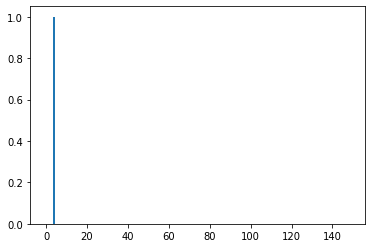

In [50]:
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
# define the model
model_rf = RandomForestRegressor()
# fit the model
model_rf.fit(X, y)
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [51]:
rf = RandomForestRegressor()
rf.fit(X, y)
#print("Features sorted by their score:")
#featureScores2 = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_)), reverse=True)


dfscoresOfRF = pd.DataFrame(rf.feature_importances_)
dfscoresOfRF.columns = ['Random Forest Importance']
dfscoresOfRF = dfscoresOfRF.sort_values(by='Random Forest Importance', ascending=False)



#concat two dataframes for better visualization 
featureScores = pd.concat([featureScores, dfscoresOfRF],axis=1)

#featureScores = featureScores.sort_Values(by='Score', ascending = False)
display(featureScores)
display(featureScores.shape)

,Features,chi2_Score,Random Forest Importance
0,time_of_group_study,33188.726035,0.0
1,absent_in_a_semester,605.423700,0.0
2,last_semester_result,22.070778,0.0
3,amount_of_drop_semester,66.729968,0.0
4,current_result_cgpa,28.457037,1.0
...,...,...,...
144,mothers_education_Graduation,2.505692,0.0
145,mothers_education_Graduation_,1.466667,0.0
146,mothers_education_HSC,0.404734,0.0
147,mothers_education_JSC,3.978907,0.0


(149, 3)

feature importance

[2.62711841e-02 2.64597721e-02 1.03199763e-01 1.16298740e-02
 1.90109259e-01 1.02360304e-02 1.09119706e-02 1.55114738e-03
 1.90503054e-03 2.80728140e-03 1.72710727e-03 5.56418962e-03
 1.51623730e-03 4.79091891e-03 1.31674710e-03 5.19360111e-03
 2.18609378e-03 1.95767908e-03 5.25692713e-03 3.89843729e-04
 1.26469031e-02 3.19698191e-03 3.06084753e-03 1.14658393e-03
 3.47031193e-03 3.82505523e-03 1.14357325e-04 1.06420535e-03
 4.36187830e-04 1.67086750e-03 4.77779229e-05 3.91801091e-03
 8.96740725e-04 2.49008477e-03 3.17100680e-03 3.69194232e-04
 3.27282738e-03 1.52737393e-03 4.23602068e-03 3.49028509e-03
 1.66526128e-03 1.14220945e-03 9.98640004e-04 7.94060205e-04
 3.82531473e-04 1.48186930e-03 1.28241398e-03 3.47693313e-04
 5.56862142e-04 2.62877113e-03 2.29583767e-03 3.85375868e-03
 1.58228808e-03 4.10625732e-03 5.23708766e-04 1.18677291e-03
 2.35612690e-03 2.63143761e-03 3.46872257e-03 1.68821053e-03
 3.27743783e-03 1.33430569e-03 2.39810932e-03 3.01343932e-03
 3.40837031e-03 1.630626

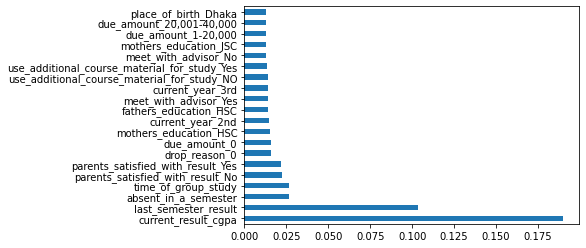

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()